In [2]:
%matplotlib inline
import os
path = '/root/github/3_SpecialModule'
os.sys.path.append(path)

from Me import *

Sucessful Import Me!!!


# Train Data

In [4]:
train_X = np.arange(20)
noise = np.random.uniform(size=20)
train_Y = train_X + noise
n_samples = train_X.shape[0]


# Params

In [5]:
learning_rate = 0.001
training_epochs = 1000
display_step = 50

# Construct Model

In [6]:
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")
pred = tf.add(tf.multiply(X, W), b)

# Loss + Optimizer

In [7]:
loss = tf.losses.mean_squared_error(y,pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Initializing the variables

In [8]:
init = tf.global_variables_initializer()

# Launch the graph

===> Epoch:0050, loss=0.496444672, W = -0.410223842, b = -0.229686990
===> Epoch:0100, loss=0.432945609, W = -0.395919412, b = -0.175181195
===> Epoch:0150, loss=0.380494207, W = -0.382093310, b = -0.125867322
===> Epoch:0200, loss=0.337117076, W = -0.368729651, b = -0.081250682
===> Epoch:0250, loss=0.301197022, W = -0.355812877, b = -0.040883955
===> Epoch:0300, loss=0.271408230, W = -0.343328267, b = -0.004362270
===> Epoch:0350, loss=0.246663660, W = -0.331261188, b = 0.028680608
===> Epoch:0400, loss=0.226071849, W = -0.319597691, b = 0.058576036
===> Epoch:0450, loss=0.208901420, W = -0.308324367, b = 0.085623823
===> Epoch:0500, loss=0.194552377, W = -0.297427982, b = 0.110095263
===> Epoch:0550, loss=0.182532161, W = -0.286896080, b = 0.132235721
===> Epoch:0600, loss=0.172436327, W = -0.276716530, b = 0.152267188
===> Epoch:0650, loss=0.163932532, W = -0.266877443, b = 0.170390636
===> Epoch:0700, loss=0.156747743, W = -0.257367373, b = 0.186787724
===> Epoch:0750, loss=0.1506

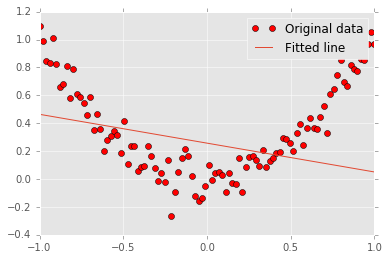

In [9]:
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(loss, feed_dict={X: train_X, y:train_Y})
            print("===> Epoch:{:04d}, loss={:.9f}, W = {:.9f}, b = {:.9f}".format(epoch+1, c, sess.run(W), sess.run(b)))

    print( "Optimization Finished!")
    training_cost = sess.run(loss, feed_dict={X: train_X, y: train_Y})
    print ("Training loss=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()